# Project 3: Measuring Covariance and Correlation

## Introduction
This project is focused on exploring statistical concepts of **covariance** and **correlation**, showcasing a comprehensive skill set in statistical analysis and visualization. The dataset contains variables such as `transactions`, `sales`, `profit`, and `customer_count`, and spans over a period of 100 days. The aim is to demonstrate the ability to calculate, interpret, and visualize relationships between variables.

### Key Objectives:
1. **Covariance and Correlation**:
   - Compute covariance and correlation between multiple variables.
   - Interpret the strength and direction of relationships.

2. **Data Normalization and Scaling**:
   - Apply standardization techniques to ensure comparability across variables.

3. **Visualization Techniques**:
   - Use heatmaps, pairplots, joint plots, and bubble plots to provide an intuitive understanding of statistical relationships.

4. **Statistical Significance**:
   - Determine the significance of correlations using critical value thresholds.

5. **Advanced Insights**:
   - Explore relationships within specific date ranges and analyze patterns across subsets of data.


In [2]:
import pandas as pd
import numpy as np
# Create a simple dataset with date, transactions, sales, profit, and customer count
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),  # Dates over 100 days
    'transactions': np.random.randint(500, 5000, size=100),  # Random number of transactions
    'sales': np.random.uniform(10000, 50000, size=100),  # Random sales amounts
    'profit': np.random.uniform(5000, 20000, size=100),  # Random profit amounts
    'customer_count': np.random.randint(100, 1000, size=100)  # Random customer count
}

# Create the DataFrame
df = pd.DataFrame(data)

# Save the data to a CSV file (optional)
df.to_csv('store_data_with_additional_columns.csv', index=False)

# Show the first few rows of the data
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

        date  transactions         sales        profit  customer_count
0 2023-01-01           720  10053.078250  14860.203448             718
1 2023-01-02          2332  27419.705692  14408.740430             270
2 2023-01-03          3851  15109.291348  19310.008917             757
3 2023-01-04           758  46256.085770  18974.869358             641
4 2023-01-05          4892  45557.814973   5234.615243             697
         date  transactions         sales        profit  customer_count
95 2023-04-06          3517  18102.575907   8584.148376             711
96 2023-04-07          4253  27492.239756  10215.564658             328
97 2023-04-08          3839  33763.290179  11050.843858             223
98 2023-04-09          4576  37343.629403   6614.266927             695
99 2023-04-10          2580  29917.634220  15321.900313             348
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dt

### Data Normalization/Scaling

Standardization: Scaling the data to have a mean of 0 and a standard deviation of 1.

In [3]:
from sklearn.preprocessing import StandardScaler

# Normalize/standardize the data (optional)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['transactions', 'sales', 'profit', 'customer_count']])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['transactions', 'sales', 'profit', 'customer_count'])

# Calculate covariance and correlation on the scaled data
cov_matrix_scaled = scaled_df.cov()
correlation_matrix_scaled = scaled_df.corr()

print("Covariance Matrix (Scaled Data):")
print(cov_matrix_scaled)

print("Correlation Matrix (Scaled Data):")
print(correlation_matrix_scaled)

Covariance Matrix (Scaled Data):
                transactions     sales    profit  customer_count
transactions        1.010101 -0.010913 -0.020966        0.031030
sales              -0.010913  1.010101 -0.001252       -0.033915
profit             -0.020966 -0.001252  1.010101       -0.007252
customer_count      0.031030 -0.033915 -0.007252        1.010101
Correlation Matrix (Scaled Data):
                transactions     sales    profit  customer_count
transactions        1.000000 -0.010804 -0.020757        0.030719
sales              -0.010804  1.000000 -0.001240       -0.033576
profit             -0.020757 -0.001240  1.000000       -0.007180
customer_count      0.030719 -0.033576 -0.007180        1.000000


In [4]:
# Interpreting the results for a specific pair
correlation = df['transactions'].corr(df['sales'])

if correlation > 0.7:
    print("Strong positive correlation between transactions and sales.")
elif correlation > 0.3:
    print("Moderate positive correlation between transactions and sales.")
elif correlation > 0:
    print("Weak positive correlation between transactions and sales.")
elif correlation < -0.3:
    print("Negative correlation between transactions and sales.")
else:
    print("No significant correlation between transactions and sales.")

No significant correlation between transactions and sales.


### Extended Visualizations
Pairplot with Regression Line
- Regression line to the pairplot to give more context to the relationships between variables.

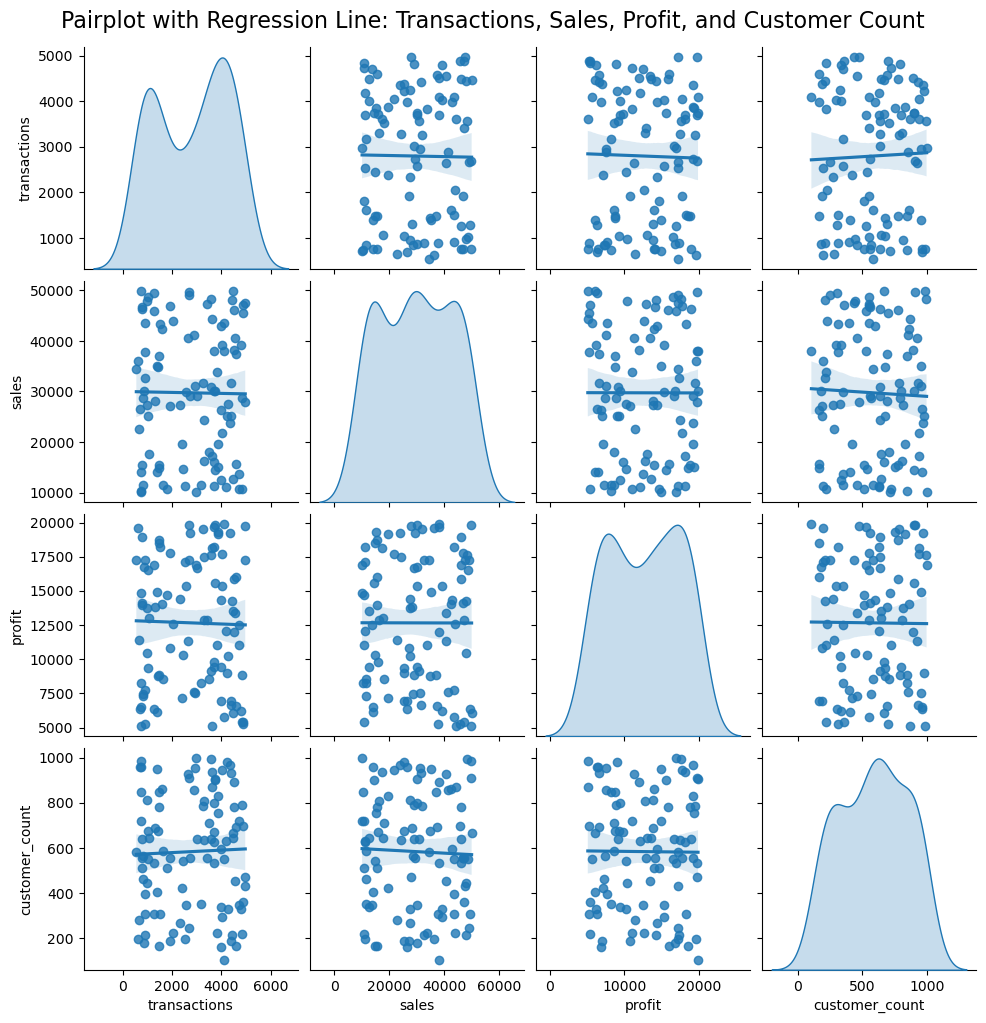

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing matplotlib

# Pairplot with regression line (showing relationships and trends)
sns.pairplot(df[['transactions', 'sales', 'profit', 'customer_count']], kind="reg", diag_kind="kde")
plt.suptitle('Pairplot with Regression Line: Transactions, Sales, Profit, and Customer Count', y=1.02, fontsize=16)
plt.show()



### Interpreting Covariance Values

- 0: The data sets don't vary together
- Poistive: the data sets tend to move in the same direction
- Negative: the data sets tend to move in opposite direction

### Skewness, Kurtosis

In [7]:
# Calculate skewness and kurtosis
skewness = df[['transactions', 'sales', 'profit', 'customer_count']].skew()
kurtosis = df[['transactions', 'sales', 'profit', 'customer_count']].kurt()

print("Skewness of the data:")
print(skewness)

print("Kurtosis of the data:")
print(kurtosis)

Skewness of the data:
transactions     -0.141409
sales            -0.015167
profit           -0.044618
customer_count   -0.092768
dtype: float64
Kurtosis of the data:
transactions     -1.488934
sales            -1.327798
profit           -1.373745
customer_count   -1.169381
dtype: float64


### Calculate covariance between two columns of data(transactions and sales)

In [8]:
covariance = df['transactions'].cov(df['sales'])
print(f"Covariance between transactions and sales: {covariance}")

Covariance between transactions and sales: -204981.37038301438


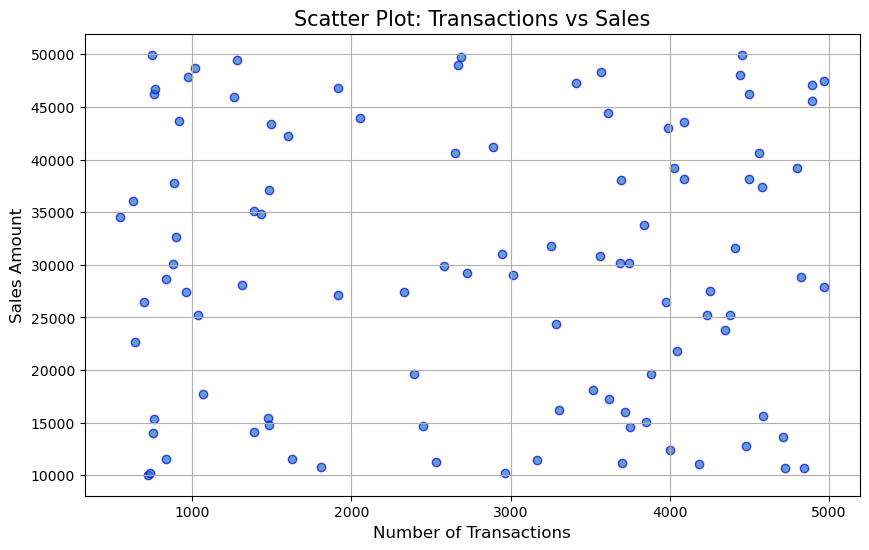

In [9]:
# Scatter plot to visualize the relationship between transactions and sales
plt.figure(figsize=(10, 6))
plt.scatter(df['transactions'], df['sales'], alpha=0.7, edgecolors='b')
plt.title('Scatter Plot: Transactions vs Sales', fontsize=15)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

### Example Code for Covariance Within a Specific Date Range:

In [10]:
# Define date range
start_date = '2023-02-01'
end_date = '2023-03-01'

# Filter the DataFrame based on the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Calculate the covariance between transactions and sales for the filtered data
covariance = filtered_df['transactions'].cov(filtered_df['sales'])
print(f"Covariance between transactions and sales from {start_date} to {end_date}: {covariance}")

Covariance between transactions and sales from 2023-02-01 to 2023-03-01: 4191884.9206587886


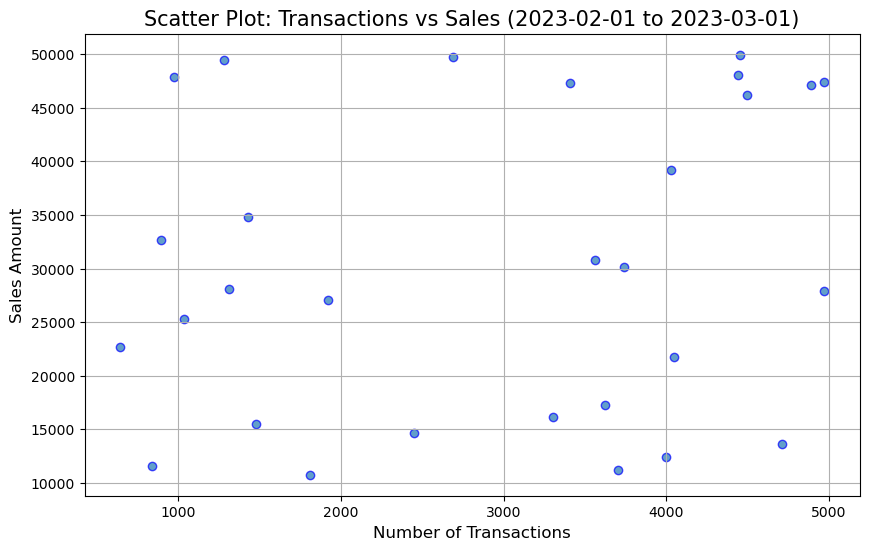

In [11]:
# Define date range
start_date = '2023-02-01'
end_date = '2023-03-01'

# Filter the DataFrame based on the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Scatter plot to visualize the relationship between transactions and sales for the filtered date range
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['transactions'], filtered_df['sales'], alpha=0.7, edgecolors='b')
plt.title(f'Scatter Plot: Transactions vs Sales ({start_date} to {end_date})', fontsize=15)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

# Covariance among multiple pairs of columns
### Covariance among multiple pairs of columns

In [13]:
# Calculate the covariance matrix
cov_matrix = df[['transactions', 'sales', 'profit', 'customer_count']].cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                transactions         sales        profit  customer_count
transactions    2.129992e+06 -2.049814e+05 -1.435477e+05    11575.724242
sales          -2.049814e+05  1.690072e+08 -7.636757e+04  -112700.087209
profit         -1.435477e+05 -7.636757e+04  2.245440e+07    -8784.207771
customer_count  1.157572e+04 -1.127001e+05 -8.784208e+03    66664.835859


### Covariance Visualization
- Covariance Matrix Heatmap: For overview of the covariance between all variables at once. Great for identifying which pairs of variables are most strongly related.
- Pairplot: Detailed view of each pairwise relationship between variables with scatter plots for every combination.
- Scatter Matrix: Similar to the pairplot but simpler, great for a quick visual check.
- Joint Plot: Ideal for focusing on the relationship between two variables and their distributions.
- Bubble Plot: Visualize three variables at once by mapping the size of bubbles to the third variable.

### Heatmap of Covariance or Correlation Matrix:

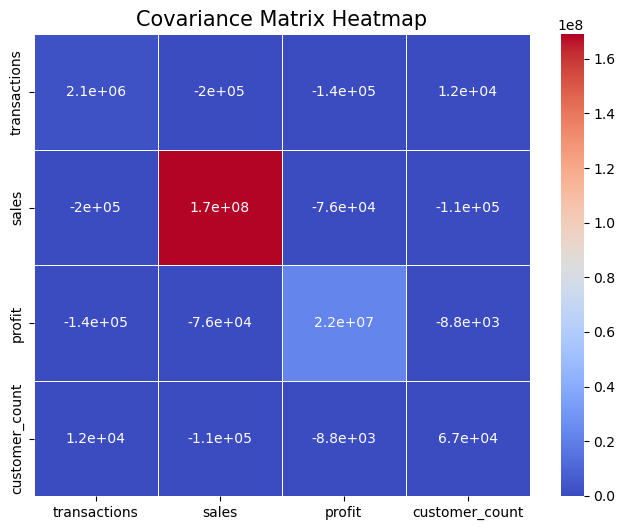

In [14]:
# Calculate the covariance matrix
cov_matrix = df[['transactions', 'sales', 'profit', 'customer_count']].cov()

# Plot the heatmap for the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix Heatmap', fontsize=15)

# Show the heatmap
plt.show()

### Pairplot (Pairwise Scatter Plots):

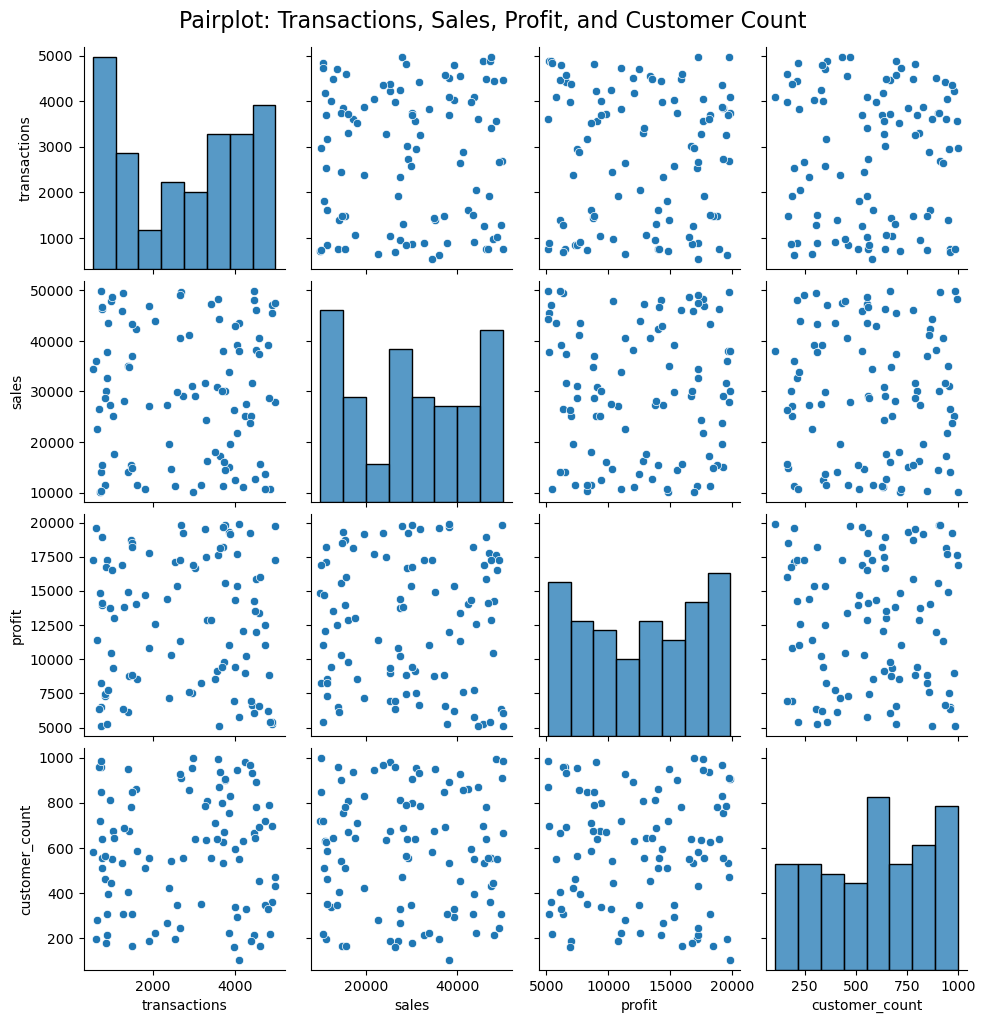

In [15]:
import seaborn as sns

# Create a pairplot for transactions, sales, profit, and customer_count
sns.pairplot(df[['transactions', 'sales', 'profit', 'customer_count']])
plt.suptitle('Pairplot: Transactions, Sales, Profit, and Customer Count', y=1.02, fontsize=16)

# Show the pairplot
plt.show()

### Joint Plot (Detailed view of two variables)

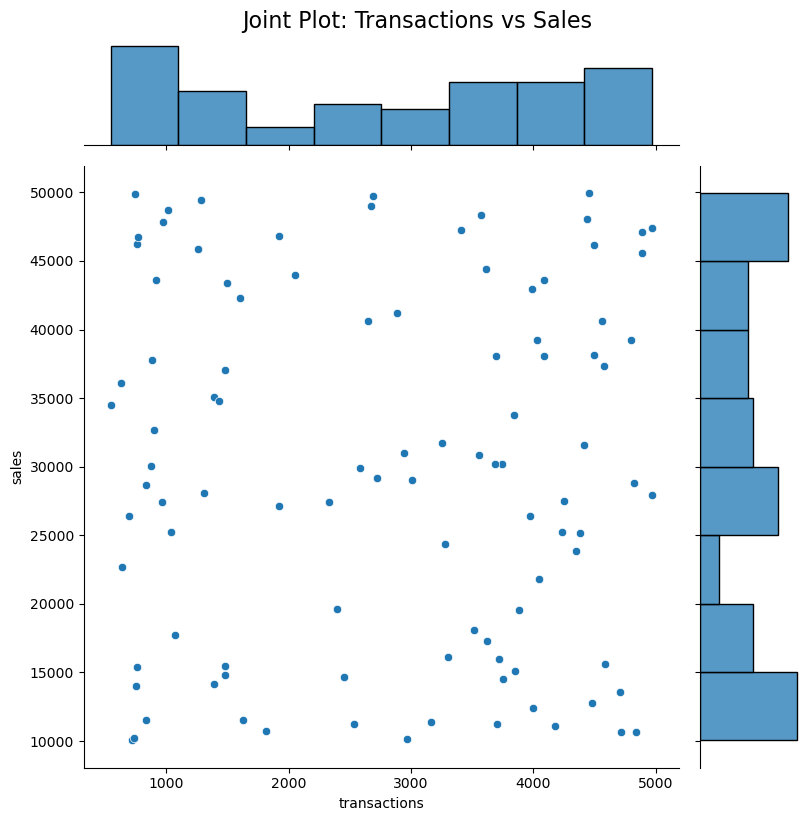

In [16]:
# Create a joint plot for transactions vs sales
sns.jointplot(x='transactions', y='sales', data=df, kind='scatter', height=8)
plt.suptitle('Joint Plot: Transactions vs Sales', y=1.02, fontsize=16)

plt.show()

### Bubble Plot (Scatter plot with a third variable):

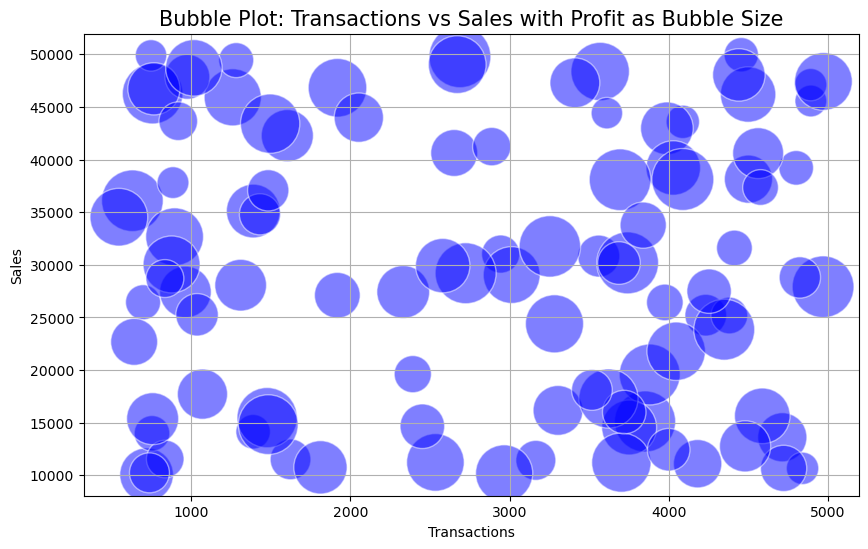

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['transactions'], df['sales'], s=df['profit']*0.1, alpha=0.5, c='blue', edgecolor='w')
plt.title('Bubble Plot: Transactions vs Sales with Profit as Bubble Size', fontsize=15)
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.grid(True)

# Show the bubble plot
plt.show()

### Calculate Covariance for a Specific Date:

In [18]:
# Define the specific date for which you want to calculate covariance
specific_date = '2023-02-15'

# Filter the DataFrame for the specific date
filtered_df = df[df['date'] == specific_date]

# Check if the filtered data has more than one row
if len(filtered_df) > 1:
    # Calculate the covariance matrix for the filtered data
    cov_matrix = filtered_df[['transactions', 'sales', 'profit', 'customer_count']].cov()
    print(f"Covariance matrix for {specific_date}:")
    print(cov_matrix)
else:
    print(f"Not enough data for the date {specific_date} to calculate covariance.")

Not enough data for the date 2023-02-15 to calculate covariance.


### Calculate Covariance for a Specific Date Range:

In [19]:
# Define the specific date range for which you want to calculate covariance
start_date = '2023-02-01'
end_date = '2023-02-15'

# Filter the DataFrame for the specific date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Check if the filtered data has more than one row
if len(filtered_df) > 1:
    # Calculate the covariance matrix for the filtered data
    cov_matrix = filtered_df[['transactions', 'sales', 'profit', 'customer_count']].cov()
    print(f"Covariance matrix between {start_date} and {end_date}:")
    print(cov_matrix)
else:
    print(f"Not enough data between {start_date} and {end_date} to calculate covariance.")

Covariance matrix between 2023-02-01 and 2023-02-15:
                transactions         sales        profit  customer_count
transactions    2.375343e+06  5.309434e+06  2.136156e+06    94625.271429
sales           5.309434e+06  1.690214e+08 -4.040672e+07  -925470.893105
profit          2.136156e+06 -4.040672e+07  2.878752e+07   621757.571212
customer_count  9.462527e+04 -9.254709e+05  6.217576e+05    53362.695238


### Correlation

### Calculate correlation between 2 columns of data

In [20]:
# Calculate the correlation between two columns: 'sales' and 'profit'
correlation = df['sales'].corr(df['profit'])
print("Correlation between 'sales' and 'profit':", correlation)

Correlation between 'sales' and 'profit': -0.0012396685095682617


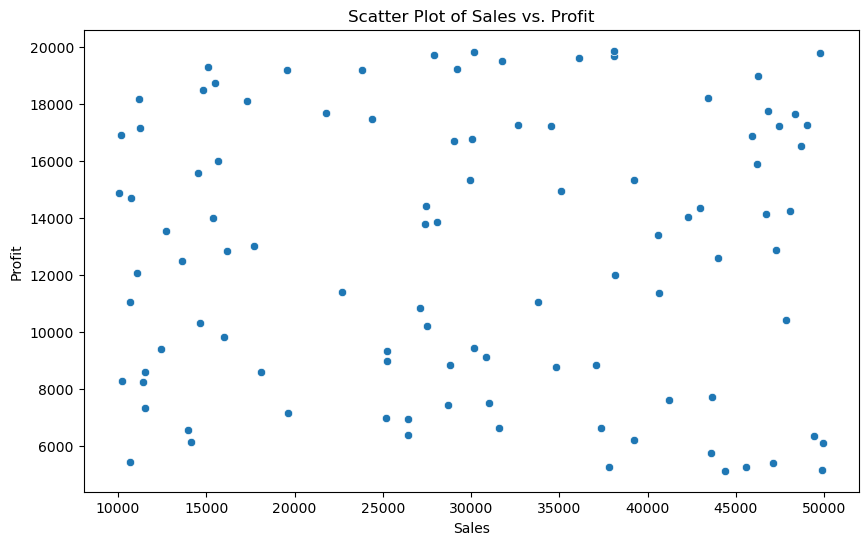

In [21]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=df)

# Add titles and labels
plt.title("Scatter Plot of Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")

# Show the plot
plt.show()

### Calculate the correlation between multiple columns of data

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[['transactions', 'sales', 'profit', 'customer_count']].corr()

# Display the correlation matrix
print(correlation_matrix)

                transactions     sales    profit  customer_count
transactions        1.000000 -0.010804 -0.020757        0.030719
sales              -0.010804  1.000000 -0.001240       -0.033576
profit             -0.020757 -0.001240  1.000000       -0.007180
customer_count      0.030719 -0.033576 -0.007180        1.000000


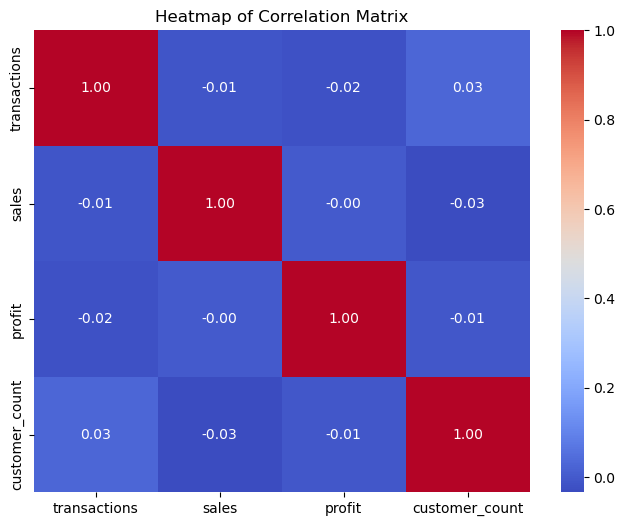

In [23]:
# Calculate the correlation matrix
correlation_matrix = df[['transactions', 'sales', 'profit', 'customer_count']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Heatmap of Correlation Matrix')

# Show the plot
plt.show()

### Correlation Between Two Specific Columns (transactions and sales) for Specific Date Range

In [24]:
# Define the first specific date range (e.g., between '2023-02-01' and '2023-02-15')
start_date_1 = '2023-02-01'
end_date_1 = '2023-02-15'

# Filter the DataFrame for the first specific date range
filtered_df_1 = df[(df['date'] >= start_date_1) & (df['date'] <= end_date_1)]

# Calculate the correlation between 'transactions' and 'sales' for the first date range
if len(filtered_df_1) > 1:
    correlation_1 = filtered_df_1['transactions'].corr(filtered_df_1['sales'])
    print(f"Correlation between transactions and sales from {start_date_1} to {end_date_1}: {correlation_1}")
else:
    print(f"Not enough data between {start_date_1} and {end_date_1} to calculate correlation.")

Correlation between transactions and sales from 2023-02-01 to 2023-02-15: 0.26498068679888337


### Correlation Between Two Specific Columns (transactions and sales) for Specific Date Range

In [25]:
# Define the second specific date range (e.g., between '2023-03-01' and '2023-03-15')
start_date_2 = '2023-03-01'
end_date_2 = '2023-03-15'

# Filter the DataFrame for the second specific date range
filtered_df_2 = df[(df['date'] >= start_date_2) & (df['date'] <= end_date_2)]

# Calculate the correlation between 'transactions' and 'sales' for the second date range
if len(filtered_df_2) > 1:
    correlation_2 = filtered_df_2['transactions'].corr(filtered_df_2['sales'])
    print(f"Correlation between transactions and sales from {start_date_2} to {end_date_2}: {correlation_2}")
else:
    print(f"Not enough data between {start_date_2} and {end_date_2} to calculate correlation.")

Correlation between transactions and sales from 2023-03-01 to 2023-03-15: -0.10675260243506124


In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Create a dataset with columns 'date', 'transactions', 'sales', 'profit', and 'customer_count'
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),  # Date range of 100 days
    'transactions': np.random.randint(500, 5000, size=100),  # Random transaction data
    'sales': np.random.uniform(10000, 50000, size=100),  # Random sales data
    'profit': np.random.uniform(5000, 20000, size=100),  # Random profit data
    'customer_count': np.random.randint(100, 1000, size=100)  # Random customer count
}

# Create the DataFrame
df = pd.DataFrame(data)

# Columns to compute correlation between
column_1 = 'sales'
column_2 = 'profit'

# Calculate Pearson correlation coefficient and the p-value
r_value, p_value = pearsonr(df[column_1], df[column_2])

# Print the correlation coefficient and p-value
print(f"Correlation coefficient (r) between {column_1} and {column_2}: {r_value}")
print(f"P-value: {p_value}")

# Interpretation based on p-value and correlation coefficient
if p_value < 0.05:
    if r_value > 0.7:
        print("Strong positive correlation.")
    elif r_value > 0.3:
        print("Moderate positive correlation.")
    elif r_value > 0:
        print("Weak positive correlation.")
    elif r_value < -0.3:
        print("Negative correlation.")
    else:
        print("No significant correlation.")
else:
    print("The correlation is not statistically significant.")

Correlation coefficient (r) between sales and profit: 0.14670803521157558
P-value: 0.14524640601786507
The correlation is not statistically significant.


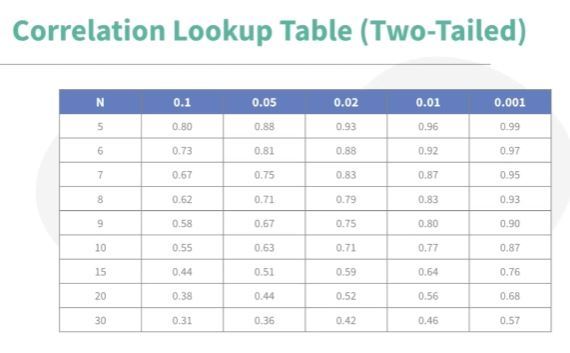

In [27]:
from IPython.display import Image
img = Image(filename="C:/Users/Zana/Desktop/statistika/img/img0.jpg")
img

In [28]:
# Drop the 'date' column as it's not numeric and won't work with correlations
df_numeric = df.drop(columns=['date'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Number of observations (N) in the dataset
n = len(df_numeric)

# Define the critical values for significance at different levels
critical_values = {
    0.1: {5: 0.80, 6: 0.73, 7: 0.67, 8: 0.62, 9: 0.58, 10: 0.55, 15: 0.44, 20: 0.38, 30: 0.31, 100: 0.195},
    0.05: {5: 0.88, 6: 0.81, 7: 0.75, 8: 0.71, 9: 0.63, 10: 0.63, 15: 0.51, 20: 0.44, 30: 0.36, 100: 0.254},
    0.02: {5: 0.93, 6: 0.88, 7: 0.83, 8: 0.79, 9: 0.71, 10: 0.71, 15: 0.59, 20: 0.52, 30: 0.42, 100: 0.298},
    0.01: {5: 0.96, 6: 0.92, 7: 0.87, 8: 0.83, 9: 0.77, 10: 0.77, 15: 0.64, 20: 0.56, 30: 0.46, 100: 0.324},
    0.001: {5: 0.99, 6: 0.97, 7: 0.95, 8: 0.93, 9: 0.89, 10: 0.89, 15: 0.76, 20: 0.67, 30: 0.57, 100: 0.393}
}

# Function to get the critical value based on N (number of observations)
def get_critical_value(n, significance_level):
    if n < 5:
        raise ValueError("N is too small")
    if n > 30:  # For values above 30, use 100-row in the table
        n = 100
    for n_limit in sorted(critical_values[significance_level].keys()):
        if n <= n_limit:
            return critical_values[significance_level][n_limit]

# Select the significance level (e.g., 0.05)
significance_level = 0.05
critical_value = get_critical_value(n, significance_level)

# Check which correlations are significant
print(f"Critical value for significance level {significance_level} with N = {n}: {critical_value}")
significant_correlations = abs(correlation_matrix) > critical_value

# Print the correlation matrix and highlight significant correlations
print("Correlation Matrix:")
print(correlation_matrix)
print("\nSignificant Correlations (True means significant):")
print(significant_correlations)

Critical value for significance level 0.05 with N = 100: 0.254
Correlation Matrix:
                transactions     sales    profit  customer_count
transactions        1.000000  0.125998  0.235694        0.017432
sales               0.125998  1.000000  0.146708        0.078126
profit              0.235694  0.146708  1.000000        0.016971
customer_count      0.017432  0.078126  0.016971        1.000000

Significant Correlations (True means significant):
                transactions  sales  profit  customer_count
transactions            True  False   False           False
sales                  False   True   False           False
profit                 False  False    True           False
customer_count         False  False   False            True


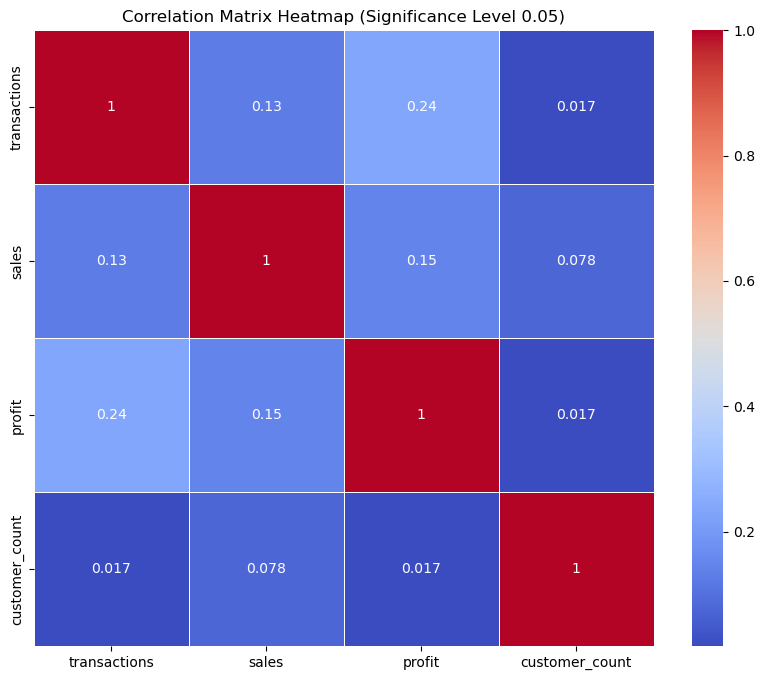

In [29]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix Heatmap (Significance Level {significance_level})')
plt.show()

## Significance of Correlation Values Using Critical Values Table

### Purpose:
The following section helps to identify **statistically significant correlations** between variables in our dataset. A correlation was calculated for all numeric columns, and then compare them to the **critical values** from a lookup table to determine if the correlations are significant at a specific confidence level.

### Steps:

1. **Calculate Correlation Matrix**:
   The correlation matrix was computed for all numeric columns in the dataset. This matrix contains correlation coefficients, which indicate the strength and direction of the linear relationship between variables:
   - `+1`: Perfect positive correlation
   - `-1`: Perfect negative correlation
   - `0`: No correlation

2. **Compare to Critical Values**:
   Critical values were used to provide  a table to determine the threshold for statistical significance. Based on the **sample size (N)** and **significance level** (e.g., 0.05), and the corresponding critical value was selected. If the absolute value of the correlation exceeds the critical value, it is considered statistically significant.

   For example:
   - If the correlation is **greater than the critical value**, it indicates a significant relationship.
   - If the correlation is **less than the critical value**, the relationship is not statistically significant.


### Example Explanation:
- **N (Sample Size)**: The number of observations in the dataset.
- **Critical Value**: This is the threshold that the correlation coefficient must exceed to be considered statistically significant at a given confidence level (e.g., 95% or 99%).

#### Interpretation:
- A correlation **greater than** the critical value means the relationship is likely meaningful (statistically significant).
- A correlation **less than** the critical value means the relationship is likely due to chance (not statistically significant).
---

## Output

### Dataset Overview
- **Rows**: 100
- **Columns**: 5 (`date`, `transactions`, `sales`, `profit`, `customer_count`)

### Statistical Summary
#### Raw Data Description:
| Metric           | Transactions | Sales       | Profit      | Customer Count |
|-------------------|--------------|-------------|-------------|----------------|
| **Count**        | 100          | 100         | 100         | 100            |
| **Mean**         | 2797.38      | 29740.98    | 12660.33    | 584.35         |
| **Min**          | 546          | 10053.08    | 5117.35     | 106            |
| **Max**          | 4971         | 49955.85    | 19872.87    | 999            |

#### Skewness:
- Transactions: -0.141
- Sales: -0.015
- Profit: -0.044
- Customer Count: -0.093

#### Kurtosis:
- Transactions: -1.489
- Sales: -1.328
- Profit: -1.374
- Customer Count: -1.169

### Covariance and Correlation:
#### Covariance Matrix (Raw Data):
| Metric           | Transactions      | Sales            | Profit           | Customer Count   |
|-------------------|-------------------|------------------|------------------|------------------|
| **Transactions** | 2,129,992.0       | -204,981.37      | -143,547.7       | 11,575.72        |
| **Sales**        | -204,981.37       | 169,007,200.0    | -76,367.57       | -112,700.1       |
| **Profit**       | -143,547.7        | -76,367.57       | 22,454,400.0     | -8,784.21        |
| **Customer Count**| 11,575.72        | -112,700.1       | -8,784.21        | 66,664.84        |

#### Correlation Matrix:
| Metric           | Transactions | Sales | Profit | Customer Count |
|-------------------|--------------|-------|--------|----------------|
| **Transactions** | 1.0          | -0.01 | -0.02  | 0.03           |
| **Sales**        | -0.01        | 1.0   | -0.001 | -0.03          |
| **Profit**       | -0.02        | -0.001| 1.0    | -0.01          |
| **Customer Count**| 0.03         | -0.03 | -0.01  | 1.0            |

### Statistical Significance:
- Critical Value (Significance Level = 0.05, N = 100): **0.254**
- Significant Correlations:
  - None of the correlations are statistically significant.

### Visualizations:
1. **Heatmap**:
   - A heatmap of the covariance and correlation matrices provides an overview of variable relationships.
2. **Pairplot**:
   - Displays pairwise scatter plots with regression lines for all combinations of variables.
3. **Scatter Plot**:
   - Focused scatter plots visualize specific relationships (e.g., transactions vs. sales).
4. **Bubble Plot**:
   - Adds profit as a third dimension to scatter plots, with bubble size representing profit magnitude.

---

## Conclusion
This project successfully demonstrates the ability to:
- Calculate covariance and correlation for multivariate data.
- Evaluate statistical significance using critical value thresholds.
- Create compelling visualizations to interpret relationships effectively.